## Bibliotecas

In [57]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


### Abertura do Arquivo

In [2]:
with open('credit.pkl', 'rb') as f:
    X_credit_train, y_credit_train, X_credit_test, y_credit_test = pickle.load(f)

In [3]:
X_credit_train.shape, y_credit_train.shape

((24435, 26), (24435,))

In [4]:
X_credit_test.shape, y_credit_test.shape

((8146, 26), (8146,))

### Naïve Bayes

In [5]:
naive_credit = GaussianNB()
naive_credit.fit(X_credit_train, y_credit_train)

GaussianNB()

In [6]:
#Remodelando os dados de 1D para 2D
y_credit_test = y_credit_test.reshape(-1,1)

In [7]:
predicao = naive_credit.predict(X_credit_test)

In [8]:
predicao

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [9]:
y_credit_test.reshape(1,-1)

array([[0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [10]:
#Acurácia
naive_acc = accuracy_score(y_credit_test, predicao)

In [11]:
naive_acc

0.8399214338325559

0.8399214338325559

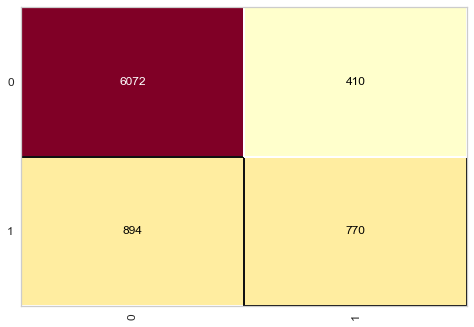

In [12]:
# Matriz de Confusão (YellowBrick)
cm = ConfusionMatrix(naive_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [13]:
#Relatório de Classificação
naive = classification_report(y_credit_test, predicao)
print(naive)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6482
           1       0.65      0.46      0.54      1664

    accuracy                           0.84      8146
   macro avg       0.76      0.70      0.72      8146
weighted avg       0.83      0.84      0.83      8146



### Decision Tree

In [14]:
tree_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree_credit.fit(X_credit_train, y_credit_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
predicao = tree_credit.predict(X_credit_test)
predicao

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [16]:
y_credit_test.reshape(1, -1)

array([[0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [17]:
#Acurácia
tree_acc = accuracy_score(y_credit_test, predicao)
tree_acc

0.8934446354038792

0.8934446354038792

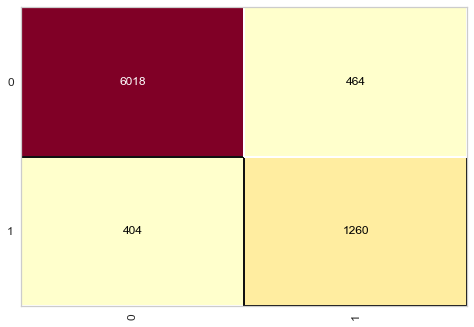

In [18]:
#Matriz de confusão
cm = ConfusionMatrix(tree_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [19]:
#Relatório de Classificação
tree = classification_report(y_credit_test, predicao)
print(tree)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6482
           1       0.73      0.76      0.74      1664

    accuracy                           0.89      8146
   macro avg       0.83      0.84      0.84      8146
weighted avg       0.89      0.89      0.89      8146



### Random Forest

In [20]:
forest_credit = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0)
forest_credit.fit(X_credit_train, y_credit_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [21]:
predicao = forest_credit.predict(X_credit_test)
predicao

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [22]:
y_credit_test.reshape(1, -1)

array([[0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [23]:
#Acurácia
forest_acc = accuracy_score(y_credit_test, predicao)
forest_acc

0.9330959980358459

0.9330959980358459

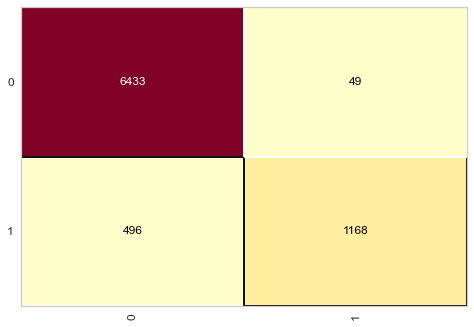

In [24]:
#Matriz de Confusão
cm = ConfusionMatrix(forest_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [25]:
#Relatório de Classificação
forest = classification_report(y_credit_test, predicao)
print(forest)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6482
           1       0.96      0.70      0.81      1664

    accuracy                           0.93      8146
   macro avg       0.94      0.85      0.89      8146
weighted avg       0.93      0.93      0.93      8146



### Aprendizagem baseada em instâncias - Knn

In [27]:
knn_credit = KNeighborsClassifier()
knn_credit.fit(X_credit_train, y_credit_train)

KNeighborsClassifier()

In [28]:
predicao = knn_credit.predict(X_credit_test)
predicao

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
y_credit_test.reshape(1, -1)

array([[0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [31]:
#Acurácia
knn_acc = accuracy_score(y_credit_test, predicao)
knn_acc

0.8957770684998773

0.8957770684998773

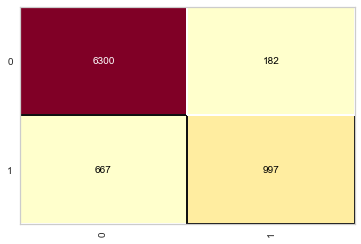

In [32]:
#Matriz de Confusão
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [33]:
#Relatório de Classificação
knn = classification_report(y_credit_test, predicao)
print(knn)

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      6482
           1       0.85      0.60      0.70      1664

    accuracy                           0.90      8146
   macro avg       0.87      0.79      0.82      8146
weighted avg       0.89      0.90      0.89      8146



### Regressão Logística

In [35]:
logistic_credit = LogisticRegression(random_state= 0)
logistic_credit.fit(X_credit_train, y_credit_train)

LogisticRegression(random_state=0)

In [36]:
logistic_credit.intercept_

array([-1.88554861])

In [37]:
logistic_credit.coef_

array([[-0.07743064,  0.01619993, -0.49304842,  0.34086635,  0.17653421,
        -0.15082924,  0.172308  ,  0.11471331, -0.04411786, -0.2280905 ,
        -0.39428818, -0.22215404, -0.05267247,  0.66405421,  0.40689466,
         0.23735982,  0.27275288,  0.00926147, -0.00926147, -0.02847766,
         0.08811532, -0.0512547 , -0.71292018,  0.04915705,  1.45424052,
         0.00682676]])

In [40]:
predicao = logistic_credit.predict(X_credit_test)
predicao

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [41]:
y_credit_test.reshape(1, -1)

array([[0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [43]:
#Acurácia
logistic_acc = accuracy_score(y_credit_test, predicao)
logistic_acc

0.871961698993371

0.871961698993371

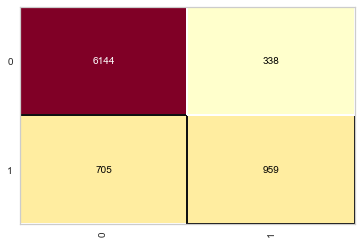

In [44]:
#Matriz de Confusão
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [46]:
# Relatório de Classificação
logistic = classification_report(y_credit_test, predicao)
print(logistic)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      6482
           1       0.74      0.58      0.65      1664

    accuracy                           0.87      8146
   macro avg       0.82      0.76      0.78      8146
weighted avg       0.86      0.87      0.87      8146



### SVM

In [49]:
svm_credit = SVC(random_state=0)
svm_credit.fit(X_credit_train, y_credit_train)

SVC(random_state=0)

In [51]:
predicao = logistic_credit.predict(X_credit_test)
predicao

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [52]:
y_credit_test.reshape(1, -1)

array([[0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [54]:
#Acurácia
svm_acc = accuracy_score(y_credit_test, predicao)
svm_acc

0.871961698993371

0.871961698993371

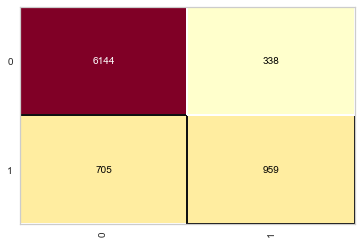

In [55]:
#Matriz de Confusão
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [56]:
#Relatório de Classificação
svm = classification_report(y_credit_test, predicao)
print(svm)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      6482
           1       0.74      0.58      0.65      1664

    accuracy                           0.87      8146
   macro avg       0.82      0.76      0.78      8146
weighted avg       0.86      0.87      0.87      8146



### Redes Neurais

In [66]:
redes_neurais_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.000001, solver='adam', activation = 'relu', \
                                     hidden_layer_sizes=(140,140))
redes_neurais_credit.fit(X_credit_train, y_credit_train)

Iteration 1, loss = 0.35391414
Iteration 2, loss = 0.28350098
Iteration 3, loss = 0.26561120
Iteration 4, loss = 0.25582684
Iteration 5, loss = 0.24932167
Iteration 6, loss = 0.24230782
Iteration 7, loss = 0.23808457
Iteration 8, loss = 0.23270674
Iteration 9, loss = 0.22997608
Iteration 10, loss = 0.22695652
Iteration 11, loss = 0.22340587
Iteration 12, loss = 0.22118346
Iteration 13, loss = 0.21809218
Iteration 14, loss = 0.21650512
Iteration 15, loss = 0.21386354
Iteration 16, loss = 0.21135894
Iteration 17, loss = 0.21092174
Iteration 18, loss = 0.20685942
Iteration 19, loss = 0.20658393
Iteration 20, loss = 0.20427468
Iteration 21, loss = 0.20281830
Iteration 22, loss = 0.20082439
Iteration 23, loss = 0.19910079
Iteration 24, loss = 0.19903663
Iteration 25, loss = 0.19620817
Iteration 26, loss = 0.19582193
Iteration 27, loss = 0.19303383
Iteration 28, loss = 0.19076106
Iteration 29, loss = 0.19130067
Iteration 30, loss = 0.19156473
Iteration 31, loss = 0.18764528
Iteration 32, los

Iteration 253, loss = 0.05307614
Iteration 254, loss = 0.04858621
Iteration 255, loss = 0.05089656
Iteration 256, loss = 0.05302635
Iteration 257, loss = 0.05595394
Iteration 258, loss = 0.05500721
Iteration 259, loss = 0.05088064
Iteration 260, loss = 0.05747771
Iteration 261, loss = 0.05276307
Iteration 262, loss = 0.05508775
Iteration 263, loss = 0.04695039
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(140, 140), max_iter=1500, tol=1e-06,
              verbose=True)

In [68]:
predicao = redes_neurais_credit.predict(X_credit_test)
predicao

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [69]:
y_credit_test.reshape(1, -1)

array([[0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [70]:
#Acurácia
redes_neurais_acc = accuracy_score(y_credit_test, predicao)
redes_neurais_acc

0.9004419346918733

0.9004419346918733

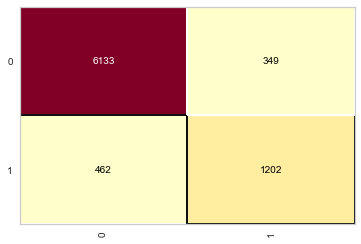

In [71]:
#Matriz de Confusão
cm = ConfusionMatrix(redes_neurais_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [72]:
#Relatório de Classificação
redes_neurais = classification_report(y_credit_test, predicao)
print(redes_neurais)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6482
           1       0.77      0.72      0.75      1664

    accuracy                           0.90      8146
   macro avg       0.85      0.83      0.84      8146
weighted avg       0.90      0.90      0.90      8146



# Avaliação dos Algoritmos

## Naïve Bayes

In [75]:
naive_acc

0.8399214338325559

In [76]:
print(naive)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6482
           1       0.65      0.46      0.54      1664

    accuracy                           0.84      8146
   macro avg       0.76      0.70      0.72      8146
weighted avg       0.83      0.84      0.83      8146



## Decision Tree

In [77]:
tree_acc

0.8934446354038792

In [78]:
print(tree)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6482
           1       0.73      0.76      0.74      1664

    accuracy                           0.89      8146
   macro avg       0.83      0.84      0.84      8146
weighted avg       0.89      0.89      0.89      8146



## Random Forest

In [79]:
forest_acc

0.9330959980358459

In [80]:
print(forest)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6482
           1       0.96      0.70      0.81      1664

    accuracy                           0.93      8146
   macro avg       0.94      0.85      0.89      8146
weighted avg       0.93      0.93      0.93      8146



## Knn

In [81]:
knn_acc

0.8957770684998773

In [82]:
print(knn)

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      6482
           1       0.85      0.60      0.70      1664

    accuracy                           0.90      8146
   macro avg       0.87      0.79      0.82      8146
weighted avg       0.89      0.90      0.89      8146



## Logistic Regression

In [83]:
logistic_acc

0.871961698993371

In [84]:
print(logistic)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      6482
           1       0.74      0.58      0.65      1664

    accuracy                           0.87      8146
   macro avg       0.82      0.76      0.78      8146
weighted avg       0.86      0.87      0.87      8146



## SVM

In [85]:
svm_acc

0.871961698993371

In [86]:
print(svm)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      6482
           1       0.74      0.58      0.65      1664

    accuracy                           0.87      8146
   macro avg       0.82      0.76      0.78      8146
weighted avg       0.86      0.87      0.87      8146



## Redes Neurais

In [87]:
redes_neurais_acc

0.9004419346918733

In [88]:
print(redes_neurais)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6482
           1       0.77      0.72      0.75      1664

    accuracy                           0.90      8146
   macro avg       0.85      0.83      0.84      8146
weighted avg       0.90      0.90      0.90      8146

